In [2]:

import argparse
import csv
import sys

import itertools
import MDAnalysis as mda

import matplotlib
matplotlib.use('Agg')  # noqa
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import numpy.linalg
from MDAnalysis.analysis.dihedrals import Ramachandran

import numpy.linalg
import numpy as np

import seaborn as sns



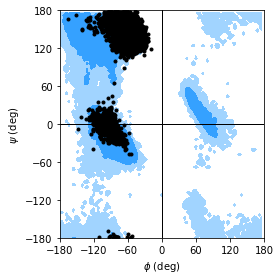

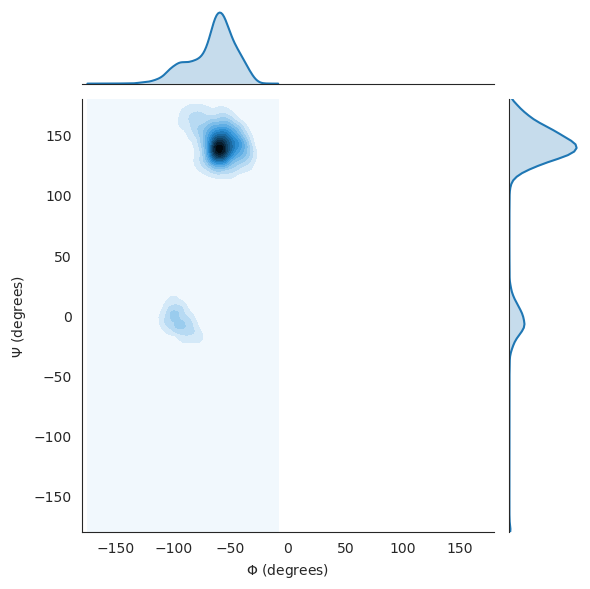

In [8]:

u = mda.Universe( "step3_charmm2omm.pdb","step5_1.dcd")

selection = "(segid %s )" % \
    ('PROF')


#if args.iresid1 is not None and args.iresid2 is not None:
#    selection = "(segid %s and resid %s-%s)" % \
#        (args.isegid1,args.iresid1,args.iresid2)

r = u.select_atoms(selection)

R = Ramachandran(r).run()
#print(R)
#print(dir(R))
#print(type(R))

fig, ax = plt.subplots(figsize=plt.figaspect(1))
R.plot(ax=ax,color='k', marker='.', ref=True)

a = R.angles.reshape(np.prod(R.angles.shape[:2]), 2)
plt.tight_layout()
#plt.savefig(args.o_plot1, format='png') # svg is better but sticking with png for now
plt.show()

sns.reset_defaults()
import imp
imp.reload(plt); imp.reload(sns)
with sns.axes_style("white"):
    #h = sns.jointplot(x=a[:,0],y=a[:,1], space=0)
    #h = sns.jointplot(x=a[:,0],y=a[:,1], kind="hex", space=0)
    h = sns.jointplot(x=a[:,0],y=a[:,1], kind="kde", space=0, n_levels=15)
    h.set_axis_labels(r'$\Phi$ (degrees)', r'$\Psi$ (degrees)')
    h.ax_joint.set_xlim(-180, 180)
    h.ax_joint.set_ylim(-180, 180)

    #g = sns.JointGrid(x=a[:,0],y=a[:,1],space=0, xlim=(-180,180), ylim=(-180,180))
    #g = g.plot_joint(sns.kdeplot, shade=True ,cmap="Blues_d" )
    #g = g.plot_marginals(sns.kdeplot, shade=True)
    #g.set_axis_labels(r'$\Phi$ (degrees)', r'$\Psi$ (degrees)')

    #k = (sns.jointplot(x=a[:,0],y=a[:,1],space=0,color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))
    #k.set_axis_labels(r'$\Phi$ (degrees)', r'$\Psi$ (degrees)')
    #k.ax_joint.set_xlim(-181, 181)
    #k.ax_joint.set_ylim(-181, 181)


    #g.ax_joint.set_xlim(-180, 180)
    #g.ax_joint.set_ylim(-180, 180)
    plt.tight_layout()
    plt.show()
    #plt.savefig(args.o_plot2, format='png')

